<a href="https://colab.research.google.com/github/PKpacheco/TCC_PUC_DataScience/blob/main/NHL_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NHL Data

In [ ]:
# NHL Dataset
# https://www.skillalytics.com/data/nhl/
# NHL Data 
import pandas as pd


# Bio Info

In [ ]:
#read bio info csv
bio_info_url ="/content/drive/MyDrive/tcc_puc/bio_info.csv"
nhl_bio_info= pd.read_csv(bio_info_url, encoding = "utf-8")

In [ ]:
nhl_bio_info.head()
nhl_bio_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      710 non-null    object
 1   S/C         710 non-null    object
 2   Pos         710 non-null    object
 3   DOB         710 non-null    object
 4   Birth City  710 non-null    object
 5   S/P         710 non-null    object
 6   Ctry        710 non-null    object
 7   Ntnlty      710 non-null    object
 8   Ht          710 non-null    int64 
 9   Wt          710 non-null    int64 
 10  Draft Yr    710 non-null    int64 
 11  Round       710 non-null    int64 
 12  Overall     710 non-null    int64 
 13  1st Season  710 non-null    int64 
 14  HOF         710 non-null    object
 15  GP          710 non-null    int64 
 16  G           710 non-null    int64 
 17  A           710 non-null    int64 
 18  P           710 non-null    int64 
dtypes: int64(10), object(9)
memory usage: 105.5+ KB


In [ ]:
# rename bio info columns
nhl_bio_info = nhl_bio_info.rename(columns={"Ht": "height", "Wt": "weight", "HOF": "hall_fame", "GP": "games_played", "G": "Goal","A": "assist", "P": "points"})
nhl_bio_info.head()

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,height,weight,Draft Yr,Round,Overall,1st Season,hall_fame,games_played,Goal,assist,points
0,Dalton Prout,R,D,1990-03-13,Kingsville,ON,CAN,CAN,75,215,2010,6,154,20112012,N,264,7,31,38
1,Craig Cunningham,R,L,1990-09-13,Trail,BC,CAN,CAN,70,184,2010,4,97,20132014,N,63,3,5,8
2,Radko Gudas,R,D,1990-06-05,Prague,--,CZE,CZE,72,208,2010,3,66,20122013,N,610,31,116,147
3,Calle Jarnkrok,R,C,1991-09-25,Gävle,--,SWE,SWE,71,186,2010,2,51,20132014,N,574,106,135,241
4,Oscar Lindberg,L,L,1991-10-29,Skellefteå,--,SWE,SWE,73,202,2010,2,57,20142015,N,252,39,40,79


In [ ]:
nhl_bio_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        710 non-null    object
 1   S/C           710 non-null    object
 2   Pos           710 non-null    object
 3   DOB           710 non-null    object
 4   Birth City    710 non-null    object
 5   S/P           710 non-null    object
 6   Ctry          710 non-null    object
 7   Ntnlty        710 non-null    object
 8   height        710 non-null    int64 
 9   weight        710 non-null    int64 
 10  Draft Yr      710 non-null    int64 
 11  Round         710 non-null    int64 
 12  Overall       710 non-null    int64 
 13  1st Season    710 non-null    int64 
 14  hall_fame     710 non-null    object
 15  games_played  710 non-null    int64 
 16  Goal          710 non-null    int64 
 17  assist        710 non-null    int64 
 18  points        710 non-null    int64 
dtypes: int64

In [ ]:
nhl_bio_info = nhl_bio_info.rename(columns={"Player":"player","Birth City": "birth_city", "Draft Yr": "draft_year", "1st Season": "first_season", "Goal": "goal"})
nhl_bio_info.head()

,player,S/C,Pos,DOB,birth_city,S/P,Ctry,Ntnlty,height,weight,draft_year,Round,Overall,first_season,hall_fame,games_played,goal,assist,points
0,Dalton Prout,R,D,1990-03-13,Kingsville,ON,CAN,CAN,75,215,2010,6,154,20112012,N,264,7,31,38
1,Craig Cunningham,R,L,1990-09-13,Trail,BC,CAN,CAN,70,184,2010,4,97,20132014,N,63,3,5,8
2,Radko Gudas,R,D,1990-06-05,Prague,--,CZE,CZE,72,208,2010,3,66,20122013,N,610,31,116,147
3,Calle Jarnkrok,R,C,1991-09-25,Gävle,--,SWE,SWE,71,186,2010,2,51,20132014,N,574,106,135,241
4,Oscar Lindberg,L,L,1991-10-29,Skellefteå,--,SWE,SWE,73,202,2010,2,57,20142015,N,252,39,40,79


In [ ]:
# separate 1st season and convert to year(20192020 --> 2019)
nhl_bio_info['first_season'] = nhl_bio_info['first_season'].astype(str)
nhl_bio_info['first_season'] = nhl_bio_info['first_season'].str[0:4]
nhl_bio_info['first_season'].astype(int)

# Add AVG Points, Assists, Goal per Games Played
nhl_bio_info['AVG_points_per_game'] = nhl_bio_info['points']/ nhl_bio_info['games_played']
nhl_bio_info['AVG_assists_per_game'] = nhl_bio_info['assist']/ nhl_bio_info['games_played']
nhl_bio_info['AVG_goal_per_game'] = nhl_bio_info['goal']/ nhl_bio_info['games_played']
nhl_bio_info.head()

,player,S/C,Pos,DOB,birth_city,S/P,Ctry,Ntnlty,height,weight,...,Overall,first_season,hall_fame,games_played,goal,assist,points,AVG_points_per_game,AVG_assists_per_game,AVG_goal_per_game
0,Dalton Prout,R,D,1990-03-13,Kingsville,ON,CAN,CAN,75,215,...,154,2011,N,264,7,31,38,0.143939,0.117424,0.026515
1,Craig Cunningham,R,L,1990-09-13,Trail,BC,CAN,CAN,70,184,...,97,2013,N,63,3,5,8,0.126984,0.079365,0.047619
2,Radko Gudas,R,D,1990-06-05,Prague,--,CZE,CZE,72,208,...,66,2012,N,610,31,116,147,0.240984,0.190164,0.050820
3,Calle Jarnkrok,R,C,1991-09-25,Gävle,--,SWE,SWE,71,186,...,51,2013,N,574,106,135,241,0.419861,0.235192,0.184669
4,Oscar Lindberg,L,L,1991-10-29,Skellefteå,--,SWE,SWE,73,202,...,57,2014,N,252,39,40,79,0.313492,0.158730,0.154762


In [ ]:
nhl_bio_info.drop(['S/C', 'Overall'], axis=1, inplace=True)

In [ ]:
nhl_bio_info.head()

,player,Pos,DOB,birth_city,S/P,Ctry,Ntnlty,height,weight,draft_year,Round,first_season,hall_fame,games_played,goal,assist,points,AVG_points_per_game,AVG_assists_per_game,AVG_goal_per_game
0,Dalton Prout,D,1990-03-13,Kingsville,ON,CAN,CAN,75,215,2010,6,2011,N,264,7,31,38,0.143939,0.117424,0.026515
1,Craig Cunningham,L,1990-09-13,Trail,BC,CAN,CAN,70,184,2010,4,2013,N,63,3,5,8,0.126984,0.079365,0.047619
2,Radko Gudas,D,1990-06-05,Prague,--,CZE,CZE,72,208,2010,3,2012,N,610,31,116,147,0.240984,0.190164,0.050820
3,Calle Jarnkrok,C,1991-09-25,Gävle,--,SWE,SWE,71,186,2010,2,2013,N,574,106,135,241,0.419861,0.235192,0.184669
4,Oscar Lindberg,L,1991-10-29,Skellefteå,--,SWE,SWE,73,202,2010,2,2014,N,252,39,40,79,0.313492,0.158730,0.154762


# Summary

In [ ]:
#read summary data
summary_url ="/content/drive/MyDrive/tcc_puc/summary_joined.csv"
nhl_summary= pd.read_csv(summary_url, encoding = "utf-8")

In [ ]:
nhl_summary.head()

,Source.Name,Player,Season,Team,S/C,Pos,GP,G,A,P,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Summary (10).xlsx,Vladislav Namestnikov,20192020,"NYR,OTT,COL",L,C,65,17,14,31,...,2,4,4,6,0,2,98,17.4,3:03:00 PM,46.8
1,Summary (10).xlsx,Vladislav Namestnikov,20172018,"TBL,NYR",L,C,81,22,26,48,...,9,16,0,0,0,2,155,14.2,5:05:00 PM,45.8
2,Summary (10).xlsx,Vladislav Namestnikov,20142015,TBL,L,C,43,9,7,16,...,1,2,0,0,0,3,46,19.6,12:00:00 PM,45.2
3,Summary (10).xlsx,Vladislav Namestnikov,20202021,DET,L,C,53,8,9,17,...,0,0,0,0,0,0,87,9.2,4:11:00 PM,39.1
4,Summary (10).xlsx,Vladislav Namestnikov,20162017,TBL,L,C,74,10,18,28,...,3,6,0,1,0,0,114,8.8,2:47:00 PM,43.5


In [ ]:
nhl_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source.Name  2384 non-null   object 
 1   Player       2384 non-null   object 
 2   Season       2384 non-null   int64  
 3   Team         2384 non-null   object 
 4   S/C          2384 non-null   object 
 5   Pos          2384 non-null   object 
 6   GP           2384 non-null   int64  
 7   G            2384 non-null   int64  
 8   A            2384 non-null   int64  
 9   P            2384 non-null   int64  
 10  +/-          2384 non-null   int64  
 11  PIM          2384 non-null   int64  
 12  P/GP         2384 non-null   float64
 13  EVG          2384 non-null   int64  
 14  EVP          2384 non-null   int64  
 15  PPG          2384 non-null   int64  
 16  PPP          2384 non-null   int64  
 17  SHG          2384 non-null   int64  
 18  SHP          2384 non-null   int64  
 19  OTG   

In [ ]:
# removing power play ad unnecessary info related columns
nhl_summary.drop(['Source.Name','PIM', 'EVG', 'EVP','PPG','PPP', 'SHP', 'OTG','GWG', 'FOW%'], axis=1, inplace=True)


In [ ]:
nhl_summary.head()

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,P/GP,SHG,S,S%,TOI/GP
0,Vladislav Namestnikov,20192020,"NYR,OTT,COL",L,C,65,17,14,31,-5,0.48,4,98,17.4,3:03:00 PM
1,Vladislav Namestnikov,20172018,"TBL,NYR",L,C,81,22,26,48,6,0.59,0,155,14.2,5:05:00 PM
2,Vladislav Namestnikov,20142015,TBL,L,C,43,9,7,16,1,0.37,0,46,19.6,12:00:00 PM
3,Vladislav Namestnikov,20202021,DET,L,C,53,8,9,17,-5,0.32,0,87,9.2,4:11:00 PM
4,Vladislav Namestnikov,20162017,TBL,L,C,74,10,18,28,-4,0.38,0,114,8.8,2:47:00 PM


In [ ]:
nhl_summary.drop(['+/-', 'FOW%'], axis=1, inplace=True)


KeyError: ignored

In [ ]:
nhl_summary.head()

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,P/GP,SHG,S,S%,TOI/GP
0,Vladislav Namestnikov,20192020,"NYR,OTT,COL",L,C,65,17,14,31,-5,0.48,4,98,17.4,3:03:00 PM
1,Vladislav Namestnikov,20172018,"TBL,NYR",L,C,81,22,26,48,6,0.59,0,155,14.2,5:05:00 PM
2,Vladislav Namestnikov,20142015,TBL,L,C,43,9,7,16,1,0.37,0,46,19.6,12:00:00 PM
3,Vladislav Namestnikov,20202021,DET,L,C,53,8,9,17,-5,0.32,0,87,9.2,4:11:00 PM
4,Vladislav Namestnikov,20162017,TBL,L,C,74,10,18,28,-4,0.38,0,114,8.8,2:47:00 PM


In [ ]:
nhl_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2384 non-null   object 
 1   Season  2384 non-null   int64  
 2   Team    2384 non-null   object 
 3   S/C     2384 non-null   object 
 4   Pos     2384 non-null   object 
 5   GP      2384 non-null   int64  
 6   G       2384 non-null   int64  
 7   A       2384 non-null   int64  
 8   P       2384 non-null   int64  
 9   +/-     2384 non-null   int64  
 10  P/GP    2384 non-null   float64
 11  SHG     2384 non-null   int64  
 12  S       2384 non-null   int64  
 13  S%      2384 non-null   float64
 14  TOI/GP  2384 non-null   object 
dtypes: float64(2), int64(8), object(5)
memory usage: 279.5+ KB


In [ ]:
nhl_summary = nhl_summary.rename(columns={"S/C": "shoots_catches", "Pos": "position", "GP": "games_played", "P/GP": "points_per_game", "S": "shoots", "Season": "season", "Player": "player" })
nhl_summary.head()

,player,season,Team,shoots_catches,position,games_played,G,A,P,+/-,points_per_game,SHG,shoots,S%,TOI/GP
0,Vladislav Namestnikov,20192020,"NYR,OTT,COL",L,C,65,17,14,31,-5,0.48,4,98,17.4,3:03:00 PM
1,Vladislav Namestnikov,20172018,"TBL,NYR",L,C,81,22,26,48,6,0.59,0,155,14.2,5:05:00 PM
2,Vladislav Namestnikov,20142015,TBL,L,C,43,9,7,16,1,0.37,0,46,19.6,12:00:00 PM
3,Vladislav Namestnikov,20202021,DET,L,C,53,8,9,17,-5,0.32,0,87,9.2,4:11:00 PM
4,Vladislav Namestnikov,20162017,TBL,L,C,74,10,18,28,-4,0.38,0,114,8.8,2:47:00 PM


In [ ]:
# separate 1st season and convert to year(20192020 --> 2019)
nhl_summary['season'] = nhl_summary['season'].astype(str)
nhl_summary['season'] = nhl_summary['season'].str[0:4]
nhl_summary['season'].astype(int)

0       2019
1       2017
2       2014
3       2020
4       2016
        ... 
2379    2019
2380    2014
2381    2021
2382    2019
2383    2020
Name: season, Length: 2384, dtype: int64

In [ ]:
nhl_summary.head()

,player,season,Team,shoots_catches,position,games_played,G,A,P,+/-,points_per_game,SHG,shoots,S%,TOI/GP
0,Vladislav Namestnikov,2019,"NYR,OTT,COL",L,C,65,17,14,31,-5,0.48,4,98,17.4,3:03:00 PM
1,Vladislav Namestnikov,2017,"TBL,NYR",L,C,81,22,26,48,6,0.59,0,155,14.2,5:05:00 PM
2,Vladislav Namestnikov,2014,TBL,L,C,43,9,7,16,1,0.37,0,46,19.6,12:00:00 PM
3,Vladislav Namestnikov,2020,DET,L,C,53,8,9,17,-5,0.32,0,87,9.2,4:11:00 PM
4,Vladislav Namestnikov,2016,TBL,L,C,74,10,18,28,-4,0.38,0,114,8.8,2:47:00 PM


In [ ]:
nhl_summary.drop(['+/-', 'SHG'], axis=1, inplace=True)


In [ ]:
nhl_summary.head()

,player,season,Team,shoots_catches,position,games_played,G,A,P,points_per_game,shoots,S%,TOI/GP
0,Vladislav Namestnikov,2019,"NYR,OTT,COL",L,C,65,17,14,31,0.48,98,17.4,3:03:00 PM
1,Vladislav Namestnikov,2017,"TBL,NYR",L,C,81,22,26,48,0.59,155,14.2,5:05:00 PM
2,Vladislav Namestnikov,2014,TBL,L,C,43,9,7,16,0.37,46,19.6,12:00:00 PM
3,Vladislav Namestnikov,2020,DET,L,C,53,8,9,17,0.32,87,9.2,4:11:00 PM
4,Vladislav Namestnikov,2016,TBL,L,C,74,10,18,28,0.38,114,8.8,2:47:00 PM


In [ ]:
# get the first 3 seasons for each player ->  calculate the avg TOI-GP / compare with all players (create top 100)
# TOI/gp per  PPG

df2=nhl_summary.sort_values(['player','season'],ascending=True).groupby('player').head(3)
df2.head()

,player,season,Team,shoots_catches,position,games_played,G,A,P,points_per_game,shoots,S%,TOI/GP
1438,Adam Brooks,2021,"MTL,VGK,WPG",L,C,25,2,1,3,0.12,14,14.3,8:57:00 AM
960,Adam Erne,2016,TBL,L,L,26,3,0,3,0.12,40,7.5,11:48:00 AM
963,Adam Erne,2017,TBL,L,L,23,3,1,4,0.17,29,10.3,10:07:00 AM
964,Adam Erne,2018,TBL,L,L,65,7,13,20,0.31,70,10.0,10:33:00 AM
856,Adam Gaudette,2018,VAN,R,C,56,5,7,12,0.21,55,9.1,10:57:00 AM


In [ ]:
#rename toi/gp column
df2 = df2.rename(columns={"TOI/GP": "toi_gp"})
df2.head()


,player,season,Team,shoots_catches,position,games_played,G,A,P,points_per_game,shoots,S%,toi_gp
1438,Adam Brooks,2021,"MTL,VGK,WPG",L,C,25,2,1,3,0.12,14,14.3,8:57:00 AM
960,Adam Erne,2016,TBL,L,L,26,3,0,3,0.12,40,7.5,11:48:00 AM
963,Adam Erne,2017,TBL,L,L,23,3,1,4,0.17,29,10.3,10:07:00 AM
964,Adam Erne,2018,TBL,L,L,65,7,13,20,0.31,70,10.0,10:33:00 AM
856,Adam Gaudette,2018,VAN,R,C,56,5,7,12,0.21,55,9.1,10:57:00 AM


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1438 to 829
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player           1239 non-null   object 
 1   season           1239 non-null   object 
 2   Team             1239 non-null   object 
 3   shoots_catches   1239 non-null   object 
 4   position         1239 non-null   object 
 5   games_played     1239 non-null   int64  
 6   G                1239 non-null   int64  
 7   A                1239 non-null   int64  
 8   P                1239 non-null   int64  
 9   points_per_game  1239 non-null   float64
 10  shoots           1239 non-null   int64  
 11  S%               1239 non-null   float64
 12  toi_gp           1239 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 135.5+ KB


In [ ]:
# remove last 2 digits and am/pm from toigp
df2['toi_gp'] = df2['toi_gp'].str[:-6]
df2.head()

,player,season,Team,shoots_catches,position,games_played,G,A,P,points_per_game,shoots,S%,toi_gp
1438,Adam Brooks,2021,"MTL,VGK,WPG",L,C,25,2,1,3,0.12,14,14.3,8:57
960,Adam Erne,2016,TBL,L,L,26,3,0,3,0.12,40,7.5,11:48
963,Adam Erne,2017,TBL,L,L,23,3,1,4,0.17,29,10.3,10:07
964,Adam Erne,2018,TBL,L,L,65,7,13,20,0.31,70,10.0,10:33
856,Adam Gaudette,2018,VAN,R,C,56,5,7,12,0.21,55,9.1,10:57


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1438 to 829
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player           1239 non-null   object 
 1   season           1239 non-null   object 
 2   Team             1239 non-null   object 
 3   shoots_catches   1239 non-null   object 
 4   position         1239 non-null   object 
 5   games_played     1239 non-null   int64  
 6   G                1239 non-null   int64  
 7   A                1239 non-null   int64  
 8   P                1239 non-null   int64  
 9   points_per_game  1239 non-null   float64
 10  shoots           1239 non-null   int64  
 11  S%               1239 non-null   float64
 12  toi_gp           1239 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 135.5+ KB


In [ ]:
# converting obj to int hour and min then calculate the total min in the ice
df2['toi_gp']
df2[['hour_ice_toi', 'min_ice_toi']] = df2['toi_gp'].str.split(':', expand=True)
df2['hour_ice_toi_int'] = df2['hour_ice_toi'].astype(int)
df2['min_ice_toi_int'] = df2['min_ice_toi'].astype(int)

df2['total_min_toi'] = (df2['hour_ice_toi_int'] * 60 )  + df2['min_ice_toi_int']

df2.head()

,player,season,Team,shoots_catches,position,games_played,G,A,P,points_per_game,shoots,S%,toi_gp,hour_ice_toi,min_ice_toi,hour_ice_toi_int,min_ice_toi_int,total_min_toi
1438,Adam Brooks,2021,"MTL,VGK,WPG",L,C,25,2,1,3,0.12,14,14.3,8:57,8,57,8,57,537
960,Adam Erne,2016,TBL,L,L,26,3,0,3,0.12,40,7.5,11:48,11,48,11,48,708
963,Adam Erne,2017,TBL,L,L,23,3,1,4,0.17,29,10.3,10:07,10,07,10,7,607
964,Adam Erne,2018,TBL,L,L,65,7,13,20,0.31,70,10.0,10:33,10,33,10,33,633
856,Adam Gaudette,2018,VAN,R,C,56,5,7,12,0.21,55,9.1,10:57,10,57,10,57,657


In [ ]:
# sum total p_a_g points, goals and assistances and divide by the time on ice to get points/time_on_ice
df2['total_p_a_g'] = df2['P'] +  df2['G'] +  df2['A']

df2['avg_points_to_ice_time'] = df2['total_p_a_g'] / df2['total_min_toi']

df2.head()


,player,season,Team,shoots_catches,position,games_played,G,A,P,points_per_game,shoots,S%,toi_gp,hour_ice_toi,min_ice_toi,hour_ice_toi_int,min_ice_toi_int,total_min_toi,total_p_a_g,avg_points_to_ice_time
1438,Adam Brooks,2021,"MTL,VGK,WPG",L,C,25,2,1,3,0.12,14,14.3,8:57,8,57,8,57,537,6,0.011173
960,Adam Erne,2016,TBL,L,L,26,3,0,3,0.12,40,7.5,11:48,11,48,11,48,708,6,0.008475
963,Adam Erne,2017,TBL,L,L,23,3,1,4,0.17,29,10.3,10:07,10,07,10,7,607,8,0.013180
964,Adam Erne,2018,TBL,L,L,65,7,13,20,0.31,70,10.0,10:33,10,33,10,33,633,40,0.063191
856,Adam Gaudette,2018,VAN,R,C,56,5,7,12,0.21,55,9.1,10:57,10,57,10,57,657,24,0.036530


In [ ]:
# calculate the sum of points for each player
new_df3 = df2[['player','season', 'games_played','total_p_a_g', 'avg_points_to_ice_time']].copy()
new_df3.info()
new_df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1438 to 829
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player                  1239 non-null   object 
 1   season                  1239 non-null   object 
 2   games_played            1239 non-null   int64  
 3   total_p_a_g             1239 non-null   int64  
 4   avg_points_to_ice_time  1239 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 58.1+ KB


,player,season,games_played,total_p_a_g,avg_points_to_ice_time
1438,Adam Brooks,2021,25,6,0.011173
960,Adam Erne,2016,26,6,0.008475
963,Adam Erne,2017,23,8,0.013180
964,Adam Erne,2018,65,40,0.063191
856,Adam Gaudette,2018,56,24,0.036530


In [ ]:
# create new df
new_df4 = nhl_bio_info[['player', 'first_season', 'draft_year', 'hall_fame']].copy()
new_df4.info()
new_df4.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player        710 non-null    object
 1   first_season  710 non-null    object
 2   draft_year    710 non-null    int64 
 3   hall_fame     710 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.3+ KB


,player,first_season,draft_year,hall_fame
0,Dalton Prout,2011,2010,N
1,Craig Cunningham,2013,2010,N
2,Radko Gudas,2012,2010,N
3,Calle Jarnkrok,2013,2010,N
4,Oscar Lindberg,2014,2010,N


In [ ]:
# merge 2 df
new_df_merged = pd.merge(new_df3, new_df4, on="player")
new_df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player                  871 non-null    object 
 1   season                  871 non-null    object 
 2   games_played            871 non-null    int64  
 3   total_p_a_g             871 non-null    int64  
 4   avg_points_to_ice_time  871 non-null    float64
 5   first_season            871 non-null    object 
 6   draft_year              871 non-null    int64  
 7   hall_fame               871 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 61.2+ KB


In [ ]:
new_df_merged.head()


,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame
0,Adam Brooks,2021,25,6,0.011173,2019,2016,N
1,Adam Erne,2016,26,6,0.008475,2016,2013,N
2,Adam Erne,2017,23,8,0.013180,2016,2013,N
3,Adam Erne,2018,65,40,0.063191,2016,2013,N
4,Adam Gaudette,2018,56,24,0.036530,2017,2015,N


In [ ]:
new_df_merged['first_season_int'] = new_df_merged['first_season'].astype(int)
new_df_merged['draft_year_int'] = new_df_merged['draft_year'].astype(int)

new_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player                  871 non-null    object 
 1   season                  871 non-null    object 
 2   games_played            871 non-null    int64  
 3   total_p_a_g             871 non-null    int64  
 4   avg_points_to_ice_time  871 non-null    float64
 5   first_season            871 non-null    object 
 6   draft_year              871 non-null    int64  
 7   hall_fame               871 non-null    object 
 8   first_season_int        871 non-null    int64  
 9   draft_year_int          871 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 74.9+ KB


In [ ]:
new_df_merged['diff_1season_to_draft_year'] = new_df_merged['first_season_int'] - new_df_merged['draft_year_int']
new_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player                      871 non-null    object 
 1   season                      871 non-null    object 
 2   games_played                871 non-null    int64  
 3   total_p_a_g                 871 non-null    int64  
 4   avg_points_to_ice_time      871 non-null    float64
 5   first_season                871 non-null    object 
 6   draft_year                  871 non-null    int64  
 7   hall_fame                   871 non-null    object 
 8   first_season_int            871 non-null    int64  
 9   draft_year_int              871 non-null    int64  
 10  diff_1season_to_draft_year  871 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 81.7+ KB


In [ ]:
new_df_merged.tail()

,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame,first_season_int,draft_year_int,diff_1season_to_draft_year
866,Zach Sanford,2018,60,40,0.052980,2016,2013,N,2016,2013,3
867,Zach Sanford,2019,58,60,0.576923,2016,2013,N,2016,2013,3
868,Zemgus Girgensons,2013,70,44,0.221106,2013,2012,N,2013,2012,1
869,Zemgus Girgensons,2014,61,60,0.141176,2013,2012,N,2013,2012,1
870,Zemgus Girgensons,2015,71,36,0.197802,2013,2012,N,2013,2012,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9de6133b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9de60be310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9de6133550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9de60bee10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9de6121ad0>],
 'means': []}

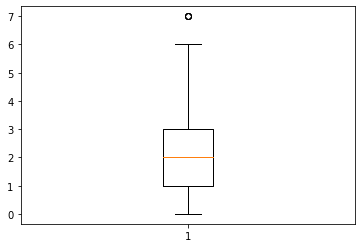

In [ ]:
'''understanding the spread of the difference in years 
from a player being drafted to having his first season playing in the nhl '''

plt.boxplot(new_df_merged['diff_1season_to_draft_year'])


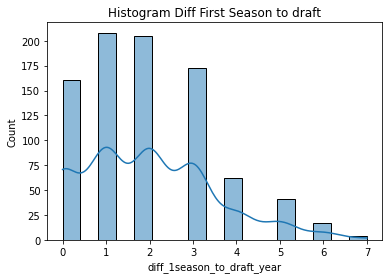

In [ ]:
ax = sns.histplot(data = new_df_merged, x = 'diff_1season_to_draft_year', kde = True)
ax.set_title("Histogram Diff First Season to draft")
plt.show()

In [ ]:
# filter 1 player to test
is_adam_erne = (new_df_merged["player"]=="Adam Erne" ) 
is_adam_erne = new_df_merged[is_adam_erne]
is_adam_erne

,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame,first_season_int,draft_year_int,diff_1season_to_draft_year
1,Adam Erne,2016,26,6,0.008475,2016,2013,N,2016,2013,3
2,Adam Erne,2017,23,8,0.013180,2016,2013,N,2016,2013,3
3,Adam Erne,2018,65,40,0.063191,2016,2013,N,2016,2013,3


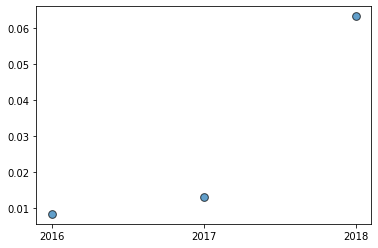

In [ ]:
import numpy as np

x = is_adam_erne['avg_points_to_ice_time']
y = is_adam_erne['season']

plt.scatter(y, x, s=60, alpha=0.7, edgecolors="k")
plt.show()

In [ ]:
# filter 1 more  player to test
is_zemgus = (new_df_merged["player"]=="Zemgus Girgensons") 
is_zemgus = new_df_merged[is_zemgus]
is_zemgus

,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame,first_season_int,draft_year_int,diff_1season_to_draft_year
868,Zemgus Girgensons,2013,70,44,0.221106,2013,2012,N,2013,2012,1
869,Zemgus Girgensons,2014,61,60,0.141176,2013,2012,N,2013,2012,1
870,Zemgus Girgensons,2015,71,36,0.197802,2013,2012,N,2013,2012,1


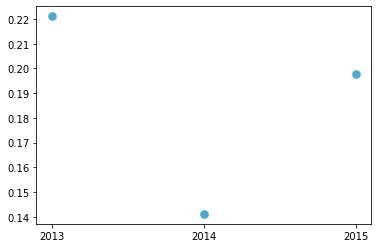

In [ ]:
x = is_zemgus['avg_points_to_ice_time']
y = is_zemgus['season']

plt.scatter(y, x, s=60, alpha=0.7, edgecolors="c")
plt.show()

In [ ]:
# filter 1 more  player to test
is_zach = (new_df_merged["player"]=="Zach Sanford" ) 
is_zach = new_df_merged[is_zach]
is_zach

,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame,first_season_int,draft_year_int,diff_1season_to_draft_year
865,Zach Sanford,2016,39,16,0.024578,2016,2013,N,2016,2013,3
866,Zach Sanford,2018,60,40,0.052980,2016,2013,N,2016,2013,3
867,Zach Sanford,2019,58,60,0.576923,2016,2013,N,2016,2013,3


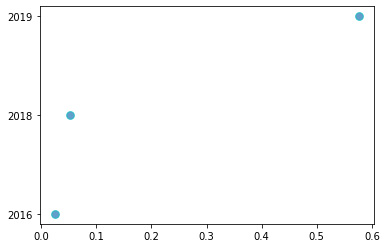

In [ ]:
x = is_zach['avg_points_to_ice_time']
y = is_zach['season']

plt.scatter(x, y, s=60, alpha=0.7, edgecolors="c")
plt.show()

In [ ]:
transpose_test = is_zach.T
transpose_test

,865,866,867
player,Zach Sanford,Zach Sanford,Zach Sanford
season,2016,2018,2019
games_played,39,60,58
total_p_a_g,16,40,60
avg_points_to_ice_time,0.024578,0.05298,0.576923
first_season,2016,2016,2016
draft_year,2013,2013,2013
hall_fame,N,N,N
first_season_int,2016,2016,2016
draft_year_int,2013,2013,2013


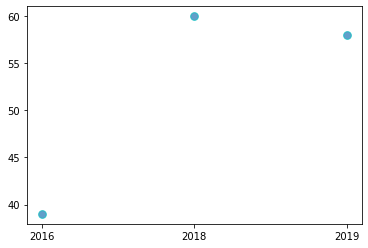

In [ ]:
x = is_zach['games_played']
y = is_zach['season']

plt.scatter(y, x, s=60, alpha=0.7, edgecolors="c")
plt.show()

In [ ]:
# Based on the BoxPlot we can use only players who have difference from 0 to 3 years, the others are outliers
# group players with diff of 0 years from draft to NHL
have_0_year_diff = (new_df_merged["diff_1season_to_draft_year"]==0) 
have_0_year_diff = new_df_merged[have_0_year_diff]
have_0_year_diff


,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame,first_season_int,draft_year_int,diff_1season_to_draft_year
14,Aleksander Barkov,2013,54,48,0.156863,2013,2013,N,2013,2013,0
15,Aleksander Barkov,2014,71,72,0.218182,2013,2013,N,2013,2013,0
16,Aleksander Barkov,2015,66,118,0.264574,2013,2013,N,2013,2013,0
20,Alex Formenton,2020,20,12,0.016667,2017,2017,N,2017,2017,0
21,Alex Formenton,2021,79,64,0.309179,2017,2017,N,2017,2017,0
...,...,...,...,...,...,...,...,...,...,...,...
820,Valeri Nichushkin,2015,79,58,0.500000,2013,2013,N,2013,2013,0
821,Valeri Nichushkin,2018,57,20,0.027972,2013,2013,N,2013,2013,0
826,Viktor Arvidsson,2015,56,32,0.043011,2014,2014,N,2014,2014,0
827,Viktor Arvidsson,2016,80,122,0.394822,2014,2014,N,2014,2014,0


In [ ]:
# convert season to int 
have_0_year_diff['season_int'] = have_0_year_diff['season'].astype(str).astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
have_0_year_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 14 to 828
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player                      161 non-null    object 
 1   season                      161 non-null    object 
 2   games_played                161 non-null    int64  
 3   total_p_a_g                 161 non-null    int64  
 4   avg_points_to_ice_time      161 non-null    float64
 5   first_season                161 non-null    object 
 6   draft_year                  161 non-null    int64  
 7   hall_fame                   161 non-null    object 
 8   first_season_int            161 non-null    int64  
 9   draft_year_int              161 non-null    int64  
 10  diff_1season_to_draft_year  161 non-null    int64  
 11  season_int                  161 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 16.4+ KB


In [ ]:
# select 1st year for players with 0 diff from draft to first nhl year
is_1st_year_diff_0 = (have_0_year_diff["season_int"]== have_0_year_diff["first_season_int"]) 
is_1st_year_diff_0 = have_0_year_diff[is_1st_year_diff_0]
is_1st_year_diff_0

,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame,first_season_int,draft_year_int,diff_1season_to_draft_year,season_int
14,Aleksander Barkov,2013,54,48,0.156863,2013,2013,N,2013,2013,0,2013
40,Alexis Lafrenière,2020,56,42,0.371681,2020,2020,N,2020,2020,0,2020
55,Andrei Svechnikov,2018,82,74,0.465409,2018,2018,N,2018,2018,0,2018
91,Auston Matthews,2016,82,138,0.408284,2016,2016,N,2016,2016,0,2016
107,Brady Tkachuk,2018,71,90,0.373444,2018,2018,N,2018,2018,0,2018
183,Cole Sillinger,2021,79,62,0.607843,2021,2021,N,2021,2021,0,2021
198,Connor McDavid,2015,45,96,0.232446,2015,2015,N,2015,2015,0,2015
214,David Pastrnak,2014,46,54,0.457627,2014,2014,N,2014,2014,0,2014
255,Elias Lindholm,2013,58,42,0.276316,2013,2013,N,2013,2013,0,2013
300,Jack Eichel,2015,81,112,0.262295,2015,2015,N,2015,2015,0,2015


In [ ]:
# sum all first year avg per ice time  (players 0 years diff)
total_diff_0_years_1_year_playing = is_1st_year_diff_0['avg_points_to_ice_time'].sum()
print(total_diff_0_years_1_year_playing)


8.797238199124573


In [ ]:
# select 2st year for players with 0 diff from draft to first nhl year
is_2st_year_diff_0 = (have_0_year_diff["season_int"]== have_0_year_diff["first_season_int"]+1) 
is_2st_year_diff_0 = have_0_year_diff[is_2st_year_diff_0]
is_2st_year_diff_0

,player,season,games_played,total_p_a_g,avg_points_to_ice_time,first_season,draft_year,hall_fame,first_season_int,draft_year_int,diff_1season_to_draft_year,season_int
15,Aleksander Barkov,2014,71,72,0.218182,2013,2013,N,2013,2013,0,2014
41,Alexis Lafrenière,2021,79,62,0.521008,2020,2020,N,2020,2020,0,2021
56,Andrei Svechnikov,2019,68,122,0.429577,2018,2018,N,2018,2018,0,2019
92,Auston Matthews,2017,62,126,0.342391,2016,2016,N,2016,2016,0,2017
108,Brady Tkachuk,2019,71,88,0.211538,2018,2018,N,2018,2018,0,2019
153,Casey Mittelstadt,2018,77,50,0.574713,2017,2017,N,2017,2017,0,2018
177,Clayton Keller,2017,82,130,0.356164,2016,2016,N,2016,2016,0,2017
199,Connor McDavid,2016,82,200,0.364964,2015,2015,N,2015,2015,0,2016
215,David Pastrnak,2015,51,52,0.444444,2014,2014,N,2014,2014,0,2015
256,Elias Lindholm,2014,81,78,0.294340,2013,2013,N,2013,2013,0,2014


In [ ]:
# sum all second year avg per ice time (players 0 years diff)
total_diff_0_years_2_year_playing = is_2st_year_diff_0['avg_points_to_ice_time'].sum()
print(total_diff_0_years_2_year_playing)


10.189014802019217


In [ ]:
# select 2st year for players with 0 diff from draft to first nhl year
is_3st_year_diff_0 = (have_0_year_diff["season_int"]== have_0_year_diff["first_season_int"]+2) 
is_3st_year_diff_0 = have_0_year_diff[is_3st_year_diff_0]
is_3st_year_diff_0

# sum all second year avg per ice time (players 0 years diff)
total_diff_0_years_3_year_playing = is_3st_year_diff_0['avg_points_to_ice_time'].sum()
print(total_diff_0_years_3_year_playing)

12.222468166456528


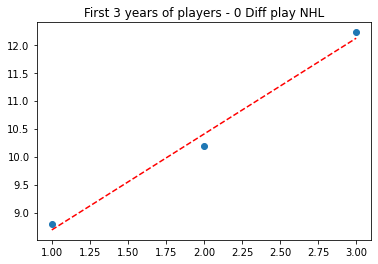

In [ ]:
# create scatter for first 3 years of players who have no difference between draft year and year they started playing in nhl
total_diffs_0_year = [total_diff_0_years_1_year_playing,total_diff_0_years_2_year_playing,total_diff_0_years_3_year_playing]

x = np.array([1, 2, 3 ])
y = total_diffs_0_year


plt.scatter(x, y)
plt.title("First 3 years of players - 0 Diff play NHL")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()


In [ ]:

# group players with diff of 1 years from draft to NHL
have_1_year_diff = (new_df_merged["diff_1season_to_draft_year"]==1) 
have_1_year_diff = new_df_merged[have_1_year_diff]
have_1_year_diff

# convert season to int 
have_1_year_diff['season_int'] = have_1_year_diff['season'].astype(str).astype(int)

# select 1st year for players with 1 diff from draft to first nhl year
is_1st_year_diff_1 = (have_1_year_diff["season_int"]== have_1_year_diff["first_season_int"]) 
is_1st_year_diff_1 = have_1_year_diff[is_1st_year_diff_1]
is_1st_year_diff_1
is_1st_year_diff_1


11.221770348791608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:

# sum all first year avg per ice time (players 1 years diff)
total_diff_1_years_1_year_playing = is_1st_year_diff_1['avg_points_to_ice_time'].sum()
print(total_diff_1_years_1_year_playing)

11.221770348791608


In [ ]:
# select 2st year for players with 1 diff from draft to first nhl year
is_2st_year_diff_1 = (have_1_year_diff["season_int"]== have_1_year_diff["first_season_int"]+1) 
is_2st_year_diff_1 = have_1_year_diff[is_2st_year_diff_1]
is_2st_year_diff_1



# sum all second year avg per ice time (players 1 years diff)
total_diff_1_years_second_year_playing = is_2st_year_diff_1['avg_points_to_ice_time'].sum()
print(total_diff_1_years_second_year_playing)

16.561440939586745


In [ ]:
# select 3st year for players with 1 diff from draft to first nhl year
is_3rd_year_diff_1 = (have_1_year_diff["season_int"]== have_1_year_diff["first_season_int"]+2) 
is_3rd_year_diff_1 = have_1_year_diff[is_3rd_year_diff_1]
is_3rd_year_diff_1


# sum all second year avg per ice time (players 1 years diff)
total_diff_1_years_third_year_playing = is_3rd_year_diff_1['avg_points_to_ice_time'].sum()
print(total_diff_1_years_third_year_playing)

16.94921953166828


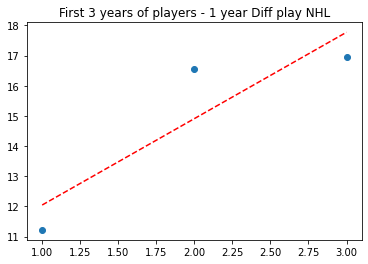

In [ ]:
# create scatter for first 3 years of players who have ONE year difference between draft year and year they started playing in nhl
total_diffs_1_year = [total_diff_1_years_1_year_playing, total_diff_1_years_second_year_playing, total_diff_1_years_third_year_playing]

x = np.array([1, 2, 3 ])
y = total_diffs_1_year


plt.scatter(x, y)
plt.title("First 3 years of players - 1 year Diff play NHL")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [ ]:
# group players with diff of 2 years from draft to NHL
have_2_year_diff = (new_df_merged["diff_1season_to_draft_year"]==2) 
have_2_year_diff = new_df_merged[have_2_year_diff]
have_2_year_diff

# convert season to int 
have_2_year_diff['season_int'] = have_2_year_diff['season'].astype(str).astype(int)

# select 1st year for players with 3 diff from draft to first nhl year
is_1st_year_diff_2 = (have_2_year_diff["season_int"]== have_2_year_diff["first_season_int"]) 
is_1st_year_diff_2 = have_2_year_diff[is_1st_year_diff_2]
is_1st_year_diff_2
is_1st_year_diff_2

# sum all first year avg per ice time (players 1 years diff)
total_diff_2_years_first_year_playing = is_1st_year_diff_2['avg_points_to_ice_time'].sum()
print(total_diff_2_years_first_year_playing)


# select 2st year for players with 2 diff from draft to first nhl year
is_2st_year_diff_2 = (have_2_year_diff["season_int"]== have_2_year_diff["first_season_int"]+1) 
is_2st_year_diff_2 = have_2_year_diff[is_2st_year_diff_2]
is_2st_year_diff_2

# sum all second year avg per ice time (players 1 years diff)
total_diff_2_years_second_year_playing = is_2st_year_diff_2['avg_points_to_ice_time'].sum()
print(total_diff_2_years_second_year_playing)


# select 3st year for players with 2 diff from draft to first nhl year
is_3rd_year_diff_2 = (have_2_year_diff["season_int"]== have_2_year_diff["first_season_int"]+2) 
is_3rd_year_diff_2 = have_2_year_diff[is_3rd_year_diff_2]
is_3rd_year_diff_2

# sum all second year avg per ice time (players 1 years diff)
total_diff_2_years_third_year_playing = is_3rd_year_diff_2['avg_points_to_ice_time'].sum()
print(total_diff_2_years_third_year_playing)


7.9264553799912125
14.477402080278418
17.727491351006943


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


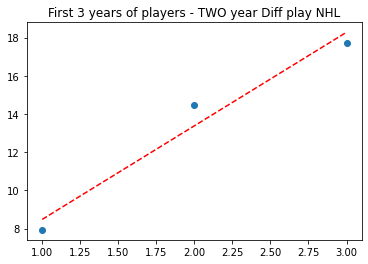

In [ ]:
# create scatter for first 3 years of players who have TWO year difference between draft year and year they started playing in nhl
total_diffs_2_year = [total_diff_2_years_first_year_playing,total_diff_2_years_second_year_playing,total_diff_2_years_third_year_playing]

x = np.array([1, 2, 3 ])
y = total_diffs_2_year


plt.scatter(x, y)
plt.title("First 3 years of players - TWO year Diff play NHL")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [ ]:
# group players with diff of 3 years from draft to NHL
have_3_year_diff = (new_df_merged["diff_1season_to_draft_year"]==3) 
have_3_year_diff = new_df_merged[have_3_year_diff]
have_3_year_diff


# convert season to int 
have_3_year_diff['season_int'] = have_3_year_diff['season'].astype(str).astype(int)

# select 1st year for players with 3 diff from draft to first nhl year
is_1st_year_diff_3 = (have_3_year_diff["season_int"]== have_3_year_diff["first_season_int"]) 
is_1st_year_diff_3 = have_3_year_diff[is_1st_year_diff_3]
is_1st_year_diff_3
is_1st_year_diff_3

# sum all first year avg per ice time (players 1 years diff)
total_diff_3_years_first_year_playing = is_1st_year_diff_3['avg_points_to_ice_time'].sum()
print(total_diff_3_years_first_year_playing)


# select 2st year for players with 2 diff from draft to first nhl year
is_2st_year_diff_3 = (have_3_year_diff["season_int"]== have_3_year_diff["first_season_int"]+1) 
is_2st_year_diff_3 = have_3_year_diff[is_2st_year_diff_3]
is_2st_year_diff_3

# sum all second year avg per ice time (players 1 years diff)
total_diff_3_years_second_year_playing = is_2st_year_diff_3['avg_points_to_ice_time'].sum()
print(total_diff_2_years_second_year_playing)


# select 3st year for players with 2 diff from draft to first nhl year
is_3rd_year_diff_3 = (have_3_year_diff["season_int"]== have_3_year_diff["first_season_int"]+2) 
is_3rd_year_diff_3 = have_3_year_diff[is_3rd_year_diff_3]
is_3rd_year_diff_3

# sum all second year avg per ice time (players 1 years diff)
total_diff_3_years_third_year_playing = is_3rd_year_diff_3['avg_points_to_ice_time'].sum()
print(total_diff_3_years_third_year_playing)


3.714128930040254
14.477402080278418
11.020444542857705


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


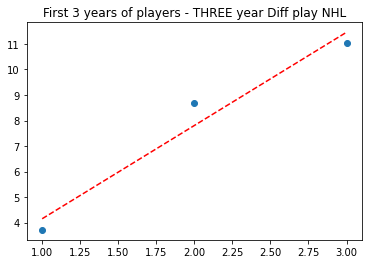

In [ ]:
# create scatter for first 3 years of players who have THREE year difference between draft year and year they started playing in nhl
total_diffs_3_year = [total_diff_3_years_first_year_playing,total_diff_3_years_second_year_playing,total_diff_3_years_third_year_playing]

x = np.array([1, 2, 3 ])
y = total_diffs_3_year


plt.scatter(x, y)
plt.title("First 3 years of players - THREE year Diff play NHL")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [ ]:
# group players with diff of 4 years from draft to NHL
have_4_year_diff = (new_df_merged["diff_1season_to_draft_year"]==4) 
have_4_year_diff = new_df_merged[have_4_year_diff]
have_4_year_diff


# convert season to int 
have_4_year_diff['season_int'] = have_4_year_diff['season'].astype(str).astype(int)

# select 1st year for players with 3 diff from draft to first nhl year
is_1st_year_diff_4 = (have_4_year_diff["season_int"]== have_4_year_diff["first_season_int"]) 
is_1st_year_diff_4 = have_4_year_diff[is_1st_year_diff_4]
is_1st_year_diff_4
is_1st_year_diff_4

# sum all first year avg per ice time (players 1 years diff)
total_diff_4_years_first_year_playing = is_1st_year_diff_4['avg_points_to_ice_time'].sum()
print(total_diff_4_years_first_year_playing)


# select 2st year for players with 2 diff from draft to first nhl year
is_2st_year_diff_4 = (have_4_year_diff["season_int"]== have_4_year_diff["first_season_int"]+1) 
is_2st_year_diff_4 = have_4_year_diff[is_2st_year_diff_4]
is_2st_year_diff_4

# sum all second year avg per ice time (players 1 years diff)
total_diff_4_years_second_year_playing = is_2st_year_diff_4['avg_points_to_ice_time'].sum()
print(total_diff_4_years_second_year_playing)


# select 3st year for players with 2 diff from draft to first nhl year
is_3rd_year_diff_4 = (have_4_year_diff["season_int"]== have_4_year_diff["first_season_int"]+2) 
is_3rd_year_diff_4 = have_4_year_diff[is_3rd_year_diff_4]
is_3rd_year_diff_4

# sum all second year avg per ice time (players 1 years diff)
total_diff_4_years_third_year_playing = is_3rd_year_diff_4['avg_points_to_ice_time'].sum()
print(total_diff_3_years_third_year_playing)


1.8080082329152576
3.3970373112015886
11.020444542857705


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


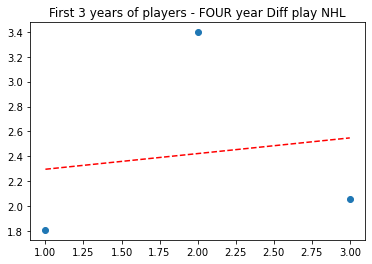

In [ ]:
# create scatter for first 3 years of players who have FOUR year difference between draft year and year they started playing in nhl
total_diffs_4_year = [total_diff_4_years_first_year_playing,total_diff_4_years_second_year_playing,total_diff_4_years_third_year_playing]

x = np.array([1, 2, 3 ])
y = total_diffs_4_year


plt.scatter(x, y)
plt.title("First 3 years of players - FOUR year Diff play NHL")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [ ]:
# group players with diff of 5 years from draft to NHL
have_5_year_diff = (new_df_merged["diff_1season_to_draft_year"]==5) 
have_5_year_diff = new_df_merged[have_5_year_diff]
have_5_year_diff


# convert season to int 
have_5_year_diff['season_int'] = have_5_year_diff['season'].astype(str).astype(int)

# select 1st year for players with 3 diff from draft to first nhl year
is_1st_year_diff_5 = (have_5_year_diff["season_int"]== have_5_year_diff["first_season_int"]) 
is_1st_year_diff_5 = have_5_year_diff[is_1st_year_diff_5]
is_1st_year_diff_5
is_1st_year_diff_5

# sum all first year avg per ice time (players 1 years diff)
total_diff_5_years_first_year_playing = is_1st_year_diff_5['avg_points_to_ice_time'].sum()
print(total_diff_5_years_first_year_playing)


# select 2st year for players with 2 diff from draft to first nhl year
is_2st_year_diff_5 = (have_5_year_diff["season_int"]== have_5_year_diff["first_season_int"]+1) 
is_2st_year_diff_5 = have_5_year_diff[is_2st_year_diff_5]
is_2st_year_diff_5

# sum all second year avg per ice time (players 1 years diff)
total_diff_5_years_second_year_playing = is_2st_year_diff_5['avg_points_to_ice_time'].sum()
print(total_diff_5_years_second_year_playing)


# select 3st year for players with 2 diff from draft to first nhl year
is_3rd_year_diff_5 = (have_5_year_diff["season_int"]== have_5_year_diff["first_season_int"]+2) 
is_3rd_year_diff_5 = have_5_year_diff[is_3rd_year_diff_5]
is_3rd_year_diff_5

# sum all second year avg per ice time (players 1 years diff)
total_diff_5_years_third_year_playing = is_3rd_year_diff_5['avg_points_to_ice_time'].sum()
print(total_diff_5_years_third_year_playing)



2.2461837566705656
2.0471842412087096
3.1225582345206013


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


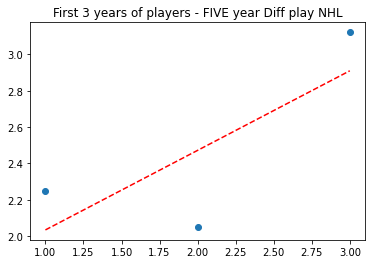

In [ ]:
# create scatter for first 3 years of players who have FIVE year difference between draft year and year they started playing in nhl
total_diffs_5_year = [total_diff_5_years_first_year_playing,total_diff_5_years_second_year_playing,total_diff_5_years_third_year_playing]

x = np.array([1, 2, 3 ])
y = total_diffs_5_year


plt.scatter(x, y)
plt.title("First 3 years of players - FIVE year Diff play NHL")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

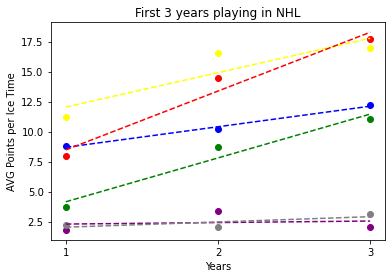

In [ ]:

x = np.array([1, 2, 3])

a = total_diffs_0_year
b = total_diffs_1_year
c = total_diffs_2_year
d = total_diffs_3_year
e = total_diffs_4_year
f = total_diffs_5_year


plt.scatter(x, a,c='Blue', label='0 year')
plt.scatter(x, b,c='Yellow', label='1 year')
plt.scatter(x, c,c='Red', label='2 year')
plt.scatter(x, d,c='Green', label='3 year')
plt.scatter(x, e,c='Purple', label='4year')
plt.scatter(x, f,c='Gray', label='5year')

plt.xticks(range(1,4))

plt.title("First 3 years playing in NHL")
plt.xlabel("Years")
plt.ylabel("AVG Points per Ice Time")

z = np.polyfit(x, a, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", c="blue")



z = np.polyfit(x, b, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",c="Yellow")


z = np.polyfit(x, c, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",c='red')



z = np.polyfit(x, d, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",c='green')



z = np.polyfit(x, e, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",c='purple')


z = np.polyfit(x, f, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",c='grey')

plt.show()


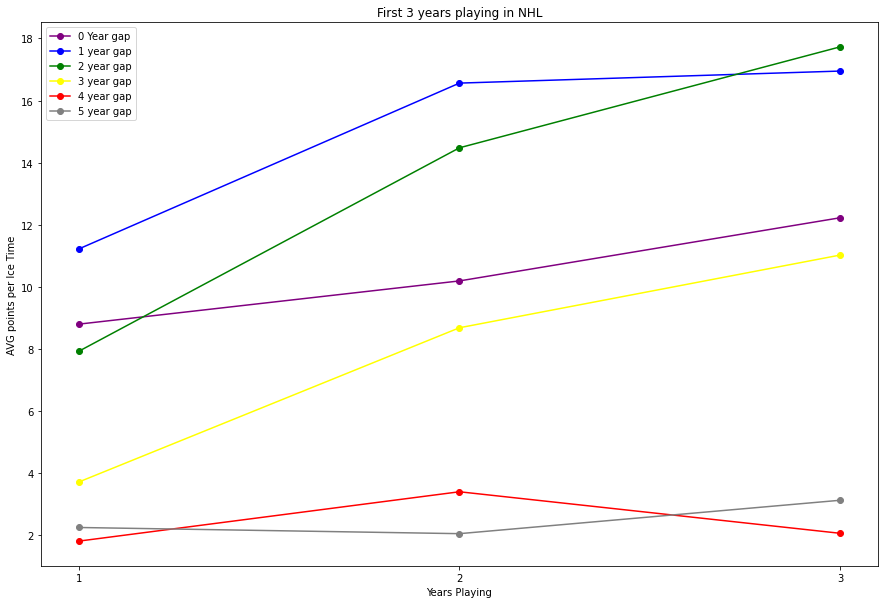

In [ ]:

years = [1,2,3]

a = total_diffs_0_year
b = total_diffs_1_year
c = total_diffs_2_year
d = total_diffs_3_year
e = total_diffs_4_year
f = total_diffs_5_year
plt.figure(figsize=(15, 10))

plt.plot(years, a, color="purple", marker="o", label="0 Year gap")
plt.plot(years, b, color="blue", marker="o", label="1 year gap")
plt.plot(years, c, color="green", marker="o", label="2 year gap")
plt.plot(years, d, color="yellow", marker="o", label="3 year gap")
plt.plot(years, e, color="red", marker="o", label="4 year gap")
plt.plot(years, f, color="grey", marker="o", label="5 year gap")
plt.title("First 3 years playing in NHL")

plt.xticks(range(1,4))


plt.ylabel("AVG points per Ice Time")

plt.xlabel("Years Playing")

plt.legend()
plt.show() 
